**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


In [3]:
import os
import numpy
import matplotlib.pyplot as matplt
import seaborn

from datasets import Dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import DataCollatorWithPadding, TrainingArguments, Trainer

seaborn.set_theme(style='whitegrid', font_scale=1.3, palette='Set2')

---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно. 
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

- $\sum\limits_{i=1}^n\left(F(i)\cdot \overline{X}\right) = \overline{X} \cdot \sum\limits_{i=1}^nF(i)$, так как $\overline{X}$ не зависит от $i$. Тогда:
$$S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2 = \frac1n\sum\limits_{i=1}^n\left(X_i^2-2\cdot X_i\cdot \overline{X} + \overline{X}^2\right) = \frac1n\left(\sum\limits_{i=1}^n\left(X_i^2\right)-\sum\limits_{i=1}^n\left(2\cdot X_i\cdot \overline{X}\right) + \sum\limits_{i=1}^n\left(\overline{X}^2\right)\right) = $$
$$ = \overline{X^2} + \frac1n\left(-2\cdot \overline{X} \cdot \sum\limits_{i=1}^n\left(X_i\right) + n \cdot \overline{X}^2\right) = \overline{X^2} + \frac1n\left(-2\cdot n \cdot \overline{X}^2 + n \cdot \overline{X}^2\right) =\overline{X^2}-\overline{X}^2$$

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

$$\mathsf{E}_\theta S^2 = \mathsf{E}_\theta \left(\overline{X^2}-\overline{X}^2 \right) = \mathsf{E}_\theta \left(\frac1n\sum\limits_{i=1}^nX_i^2 - \frac1{n^2}\left(\sum\limits_{i=1}^n X_i\right)^2\right) = \frac1n\sum\limits_{i=1}^n  \mathsf{E}_\theta X_i^2 - \frac1{n^2} \mathsf{E}_\theta \left(\sum\limits_{i=1}^n X_i\right)^2 = \frac1n\sum\limits_{i=1}^n  \mathsf{E}_\theta X_1^2 - \frac1{n^2} \mathsf{E}_\theta \left(\sum\limits_{i=1}^n X_i^2 + \sum\limits_{i,j=1, i \neq j}^nX_iX_j\right) = $$
 $$= \mathsf{E}_\theta X_1^2 - \frac1{n^2} \left( \sum\limits_{i=1}^n \mathsf{E}_\theta X_i^2 + \sum\limits_{i,j=1, i \neq j}^n \mathsf{E}_\theta \left(X_iX_j\right)\right) = \mathsf{E}_\theta X_1^2 - \frac1{n^2} \left( n \cdot \mathsf{E}_\theta X_1^2 + \sum\limits_{i,j=1, i \neq j}^n \left(\mathsf{E}_\theta X_i \cdot \mathsf{E}_\theta X_j\right)\right) = \mathsf{E}_\theta X_1^2 - \frac1{n^2} \left( n \cdot \mathsf{E}_\theta X_1^2 + \sum\limits_{i,j=1, i \neq j}^n \left(\mathsf{E}_\theta X_1\right)^2\right) = $$
 $$ = \mathsf{E}_\theta X_1^2 - \frac1{n^2} \left( n \cdot \mathsf{E}_\theta X_1^2 + (n-1)n \cdot \left(\mathsf{E}_\theta X_1\right)^2\right) = \frac{n-1}{n} \cdot \left( \mathsf{E}_\theta X_1^2 - \left(\mathsf{E}_\theta X_1\right)^2\right) = \frac{n-1}{n} \cdot \sigma^2$$ 
- Использую линейность матожидания в 3 и 5 переходах. Использую независимость $X_i$ в 6 переходе. Использую равенство матожей для всех $X_i$ в 4, 6 и 7 переходах
- Получается, статистика $S^2$ несмещенной оценкой $\sigma^2$ не является, но с увеличением $n$ стремится к $\sigma^2$

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?
- $S^2$ несмещенным не является по доказанному выше. 
- $\mathsf{E}_\theta \left(\frac{n}{n-1}S^2\right) = \frac{n}{n-1} \cdot \mathsf{E}_\theta S^2 = \frac{n}{n-1} \cdot \frac{n-1}{n} \cdot \sigma^2 = \sigma^2$ в силу линейности матожидания, значит $\frac{n}{n-1}S^2$ несмещенной является

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


- Определим функцию, визуализирующую требуемое по шаблону

In [4]:
colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
labels = [r'Оценка $S^2$', r'Оценка $\frac{n}{n-1}S^2$']


def visualize_estimation(estimations_v, size):
    # Вначале:
    matplt.figure(figsize=(16, 9))

    # Для каждой оценки:
    # y - номер оценки
    for y in range(len(estimations_v)):
        matplt.scatter(estimations_v[y], numpy.zeros(500) + y, alpha=0.1, s=100, color=colors[y], label=labels[y])
        matplt.scatter(estimations_v[y].mean(), y, marker='*', s=200, color='w', edgecolors='black')

    # Для всего графика:
    matplt.vlines(1, 0, 1, color='r')
    matplt.title(f'Размер выборки = {size}')
    matplt.yticks([])
    matplt.legend()
    matplt.show()

- Построим графики

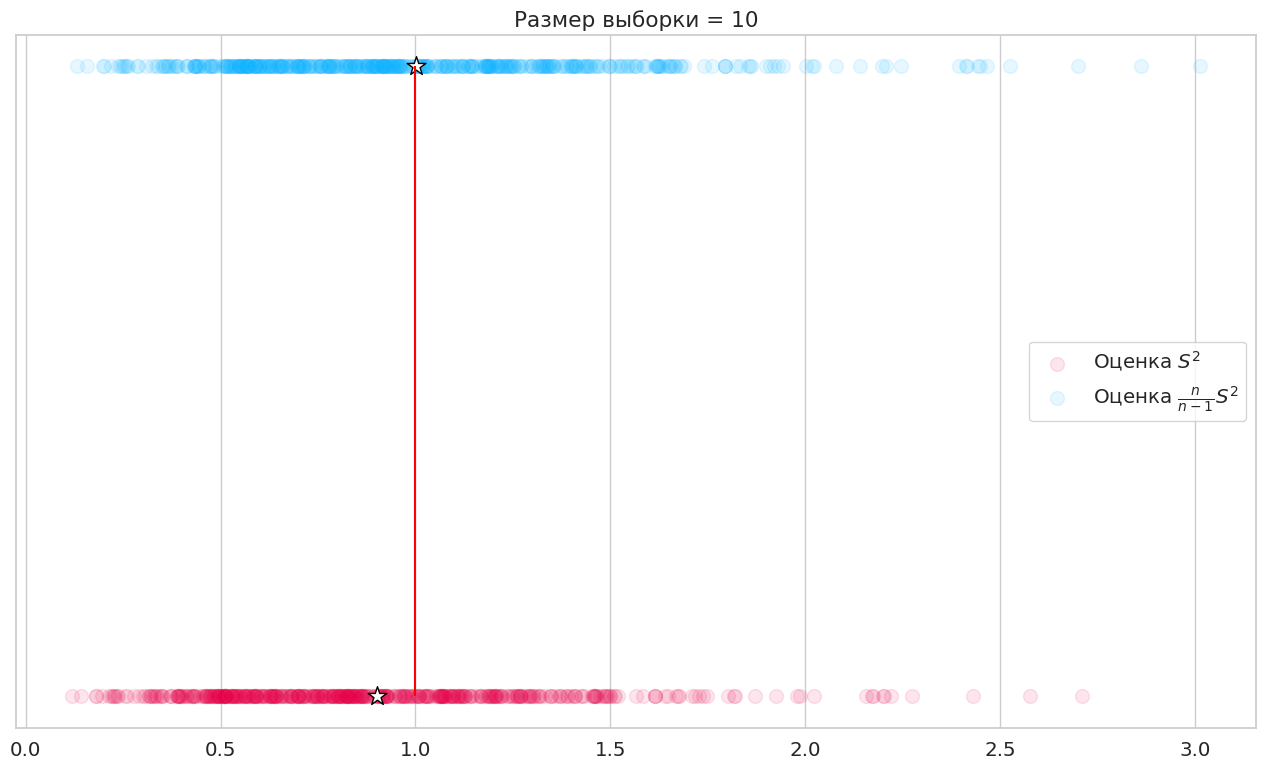

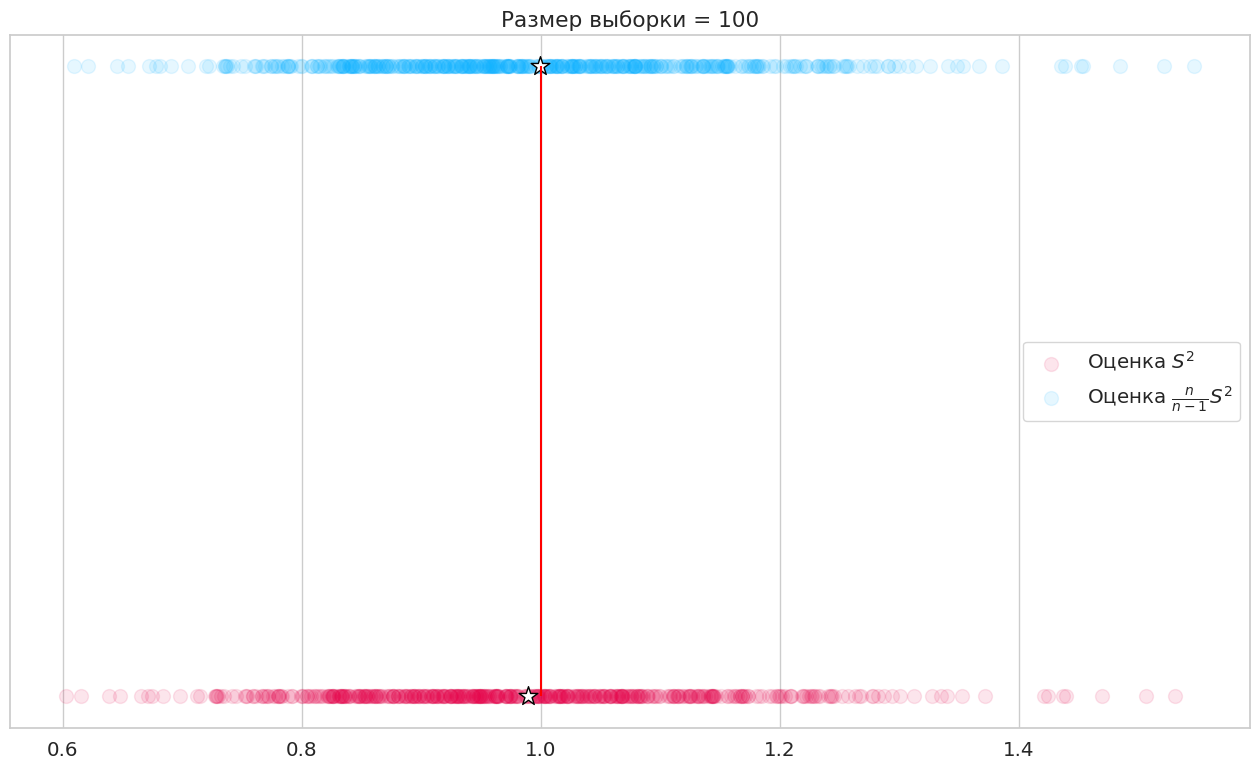

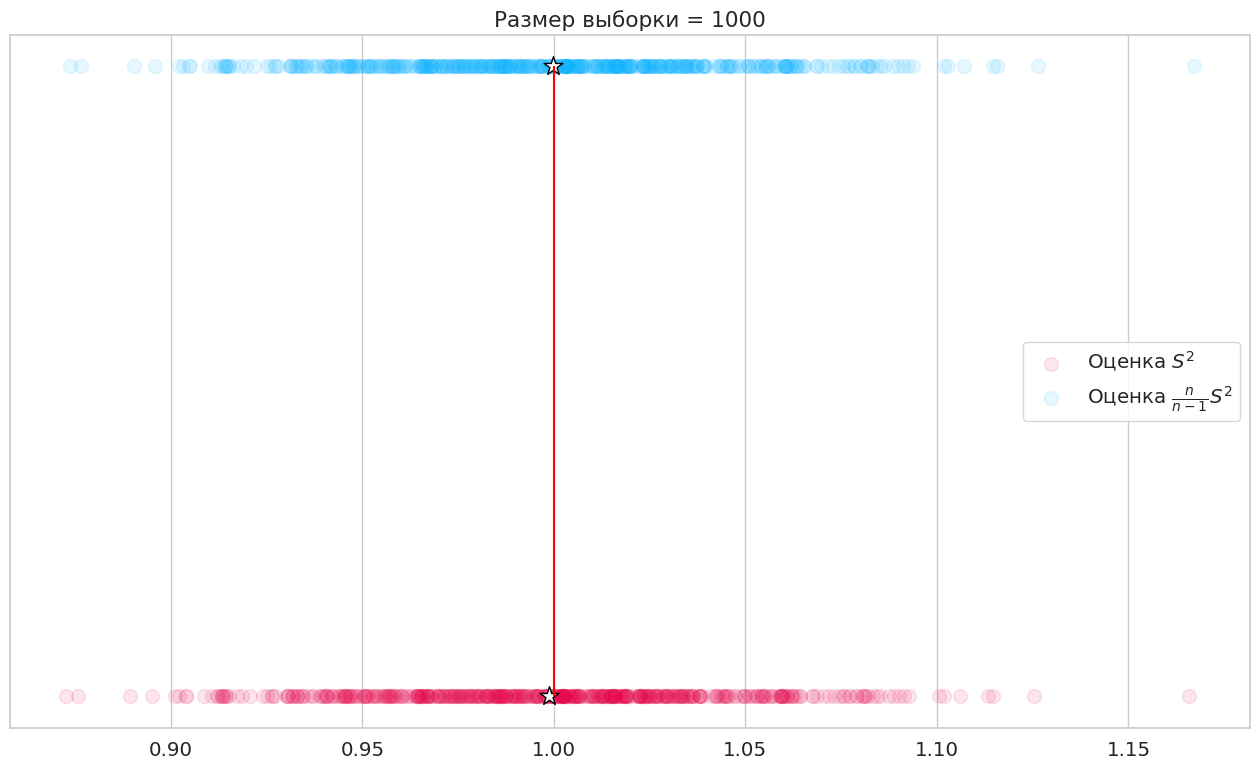

In [5]:
sigma = 1
n = [10, 100, 1000]

for i in range(3):
    variables = numpy.random.normal(0, sigma, (500, n[i]))
    S2 = (variables * variables).mean(axis=1) - variables.mean(axis=1) * variables.mean(axis=1)
    estimations = [S2, S2 * n[i] / (n[i] - 1)]

    visualize_estimation(estimations, n[i])

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено. 

- Определим функцию для подсчета накопительного среднего

In [6]:
def cumavg(arr):
    return arr.cumsum(axis=1) / (numpy.arange(arr.shape[1]) + 1)

- Построим график

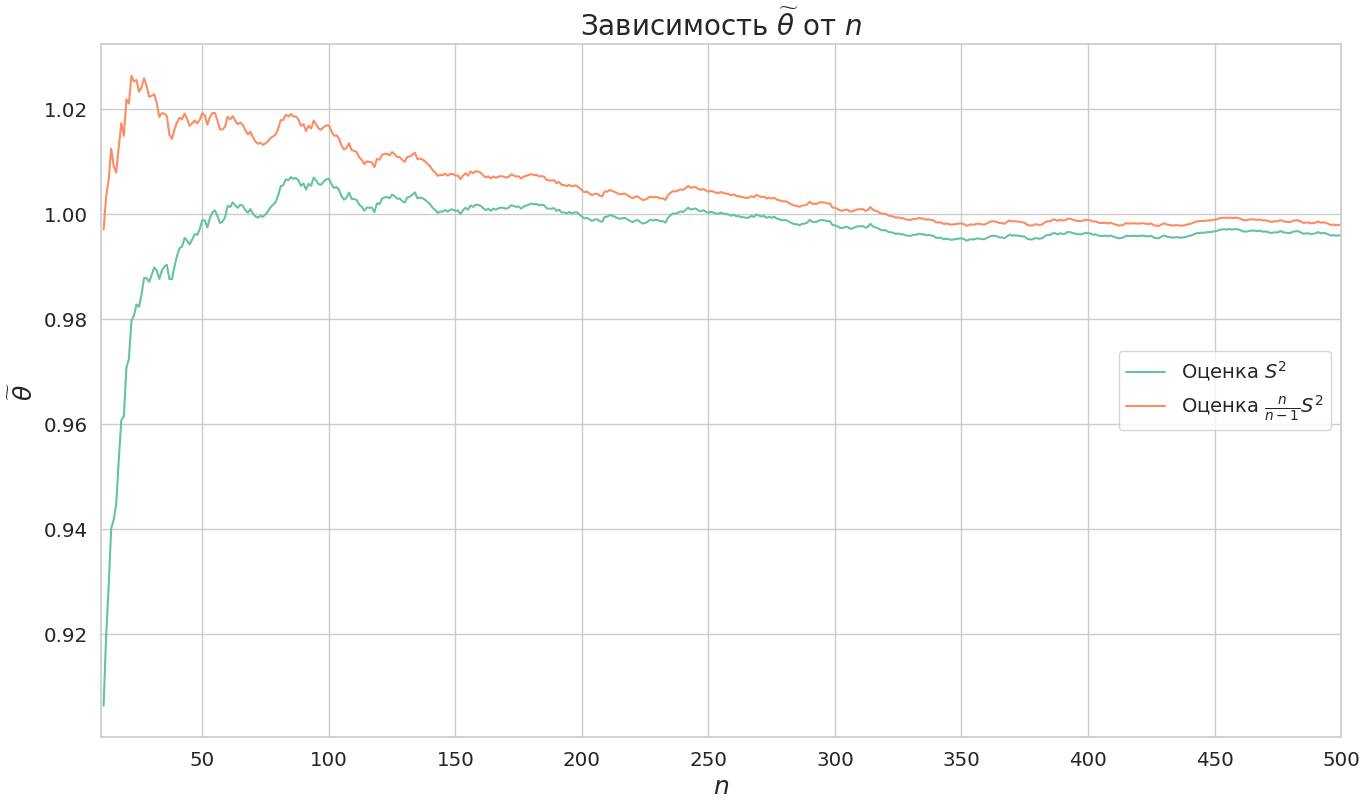

In [8]:
n_min = 10
n_max = 500

x_ticks = numpy.arange(n_max - n_min) + n_min + 1
variables = numpy.random.normal(0, sigma, (500, n_max))

avg_S2 = (cumavg(variables * variables) - cumavg(variables) * cumavg(variables)).mean(axis=0)[n_min:]
estimations = [avg_S2, avg_S2 * x_ticks / (x_ticks - 1)]

matplt.figure(figsize=(16, 9))
matplt.plot(x_ticks, estimations[0], label=labels[0])
matplt.plot(x_ticks, estimations[1], label=labels[1])

matplt.title(r'Зависимость $\widetilde{\theta}$ от $n$', fontsize=20)
matplt.xlabel('$n$', fontsize=18)
matplt.ylabel(r'$\widetilde{\theta}$', fontsize=18)
matplt.legend(fontsize=14, loc=5)
matplt.xlim((n_min, n_max))
matplt.locator_params(axis='x', nbins=10)
matplt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок? 

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

- Свойство несмещенности важно для маленьких $n$, так как $\lim_{n\to\infty} \frac{n-1}{n} = 1$. В особенности это влияет, когда проводится несколько независимых экспериментов: провести даже больше 10 порой представляется трудным, но хочется посчитать отклонение результатов от ожидаемого, которое может быть вызвано случайными факторами вроде кривых рук экспериментатора, что называют случайной погрешностью.
- Свойство несмещенности говорит нам, что в среднем наша оценка совпадает с параметром, в нашем случае. Означает это свойство отсутствие ошибки «в среднем», т.е. при систематическом использовании данной оценки она не будет зависеть от количества использований (отсутствие систематической ошибки).
- В нашем случае систематическая ошибка заключалась в коэффициенте $\frac{n-1}{n}$, что отображается на графике в виде того, что оценка $\frac{n}{n-1}S^2$ находится выше оценки $S^2$, примерно повторяя ее форму, и ближе к ожидаемой дисперсии, равной 1

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.
 
![news.jpg](news.jpg)



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.
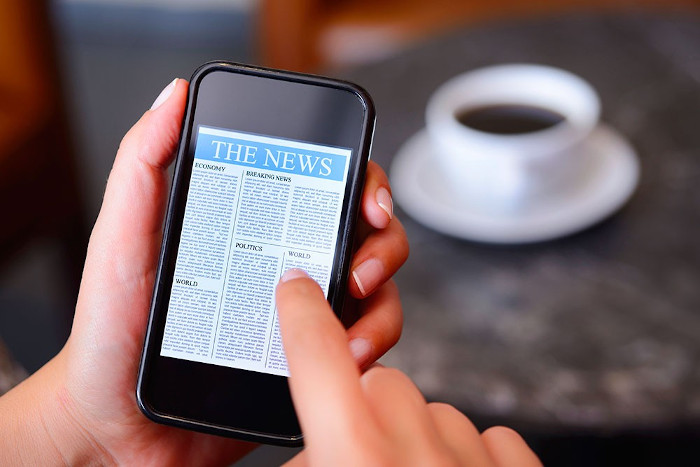

In [4]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=random_state, remove=remove)
data_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=random_state, remove=remove)

Посмотрим на какое-нибудь сообщение

In [26]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [25]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [27]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [5]:
train_features, valid_features, train_target, valid_target = train_test_split(data_train['data'], data_train['target'])
test_features, test_target = data_test['data'], data_test['target']
features = {'train': train_features, 'valid': valid_features, 'test': test_features}
target = {'train': train_target, 'valid': valid_target, 'test': test_target}

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

- Метод ближайших соседей должен вычислить расстояние до всех имеющихся в обучающем наборе сюжетов. Это может быть вычислительно затратно, при больших объемах данных.
- В задачах, где признаков много, и размерность пространства признаков велика, метод ближайших соседей лажает от того, что при увеличении размерности пространства признаков расстояния между точками становятся все более схожими, что снижает эффективность метода, а у нас признаков аж 20
- В случае текстовых данных выбор подходящей метрики является неочевидной задачей.
- Метод ближайших соседей рассматривает каждое слово независимо от других и не учитывает их сложение в контекст. Это может привести к неправильной классификации в случаях, когда смысловая схожесть играет важную роль.

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

- Определим функцию, подготавливающую данные, приводя их к численному виду, с помощью `CountVectorizer`

In [17]:
def prepare(data_v, param_v):
    # Подготавливаем данные
    vectorizer = CountVectorizer(min_df=param_v['min_df'], max_df=param_v['max_df'])
    vectorizer.fit(train_features)

    data_o = {}
    for key, value in data_v.items():
        data_o[key] = vectorizer.transform(value).toarray()
    return data_o


- Определим разные гиперпараметрах словаря

In [18]:
params = [{'min_df': 0.01, 'max_df': 0.04},
          {'min_df': 0.01, 'max_df': 0.05},
          {'min_df': 0.01, 'max_df': 0.07},
          {'min_df': 0.01, 'max_df': 0.08},
          {'min_df': 0.02, 'max_df': 0.05},
          {'min_df': 0.005, 'max_df': 0.05},
          {'min_df': 0.003, 'max_df': 0.05},
          {'min_df': 0.002, 'max_df': 0.05},
          {'min_df': 0.003, 'max_df': 0.07}]

-  Лучше всех себя показала модель с параметрами `min_df` $= 0.003$ и `max_df` $= 0.07$

- Подготовим данные и обучим модели, посчитав для каждой точность

In [19]:
for i in range(len(params)):
    features_vec = prepare(features, params[i])
    model = MultinomialNB()
    model.fit(features_vec['train'], target['train'])

    predictions = model.predict(features_vec['valid'])
    print(
        f"Точность модели с min_df = {params[i]['min_df'] :.3} и max_df = {params[i]['max_df'] :.3}: {accuracy_score(valid_target, predictions) :.3}")

Точность модели с min_df = 0.01 и max_df = 0.04: 0.68
Точность модели с min_df = 0.01 и max_df = 0.05: 0.689
Точность модели с min_df = 0.01 и max_df = 0.07: 0.7
Точность модели с min_df = 0.01 и max_df = 0.08: 0.697
Точность модели с min_df = 0.02 и max_df = 0.05: 0.563
Точность модели с min_df = 0.005 и max_df = 0.05: 0.746
Точность модели с min_df = 0.003 и max_df = 0.05: 0.788
Точность модели с min_df = 0.002 и max_df = 0.05: 0.806
Точность модели с min_df = 0.003 и max_df = 0.07: 0.788


Посчитайте качество на тестовой выборке.

In [20]:
param = {'min_df': 0.003, 'max_df': 0.07}
features_vec = prepare(features, param)

model = MultinomialNB()
model.fit(features_vec['train'], target['train'])

predictions = model.predict(features_vec['test'])
print(f"Точность: {accuracy_score(test_target, predictions) :.3}")

Точность: 0.717


Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

- Подготовим данные, перенеся их в датасеты

In [7]:
train = Dataset.from_dict({'feature': train_features, 'target': train_target})
valid = Dataset.from_dict({'feature': valid_features, 'target': valid_target})
test = Dataset.from_dict({'feature': test_features, 'target': test_target})

In [8]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(data_train['target_names']))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
def preprocess_function(examples):
    return tokenizer(examples["feature"])


tokenized_train = train.map(preprocess_function, batched=True)
tokenized_valid = valid.map(preprocess_function, batched=True)
tokenized_test = test.map(preprocess_function, batched=True)

Map:   0%|          | 0/8485 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (619 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/2829 [00:00<?, ? examples/s]

Map:   0%|          | 0/7532 [00:00<?, ? examples/s]

In [11]:
def compute_metrics(eval_pred):
    """
    Функция для вычисления метрик на валидации, подается в Trainer

    :param eval_pred: tuple из двух элементов: предсказания модели (логиты) и истинные метки

    :return: словарь со значением метрики accuracy
    """
    logits_v, labels_v = eval_pred
    predictions_v = numpy.argmax(logits_v, axis=1)
    return {"accuracy": accuracy_score(labels_v, predictions_v)}


# Задаем имя проекта в wandb
os.environ["WANDB_PROJECT"] = "News classification"

# Задаем основные параметры обучения
training_args = TrainingArguments(
    output_dir="news_classifier",  # Директория для сохранения обученной модели
    learning_rate=2e-5,  # Темп обучения
    per_device_train_batch_size=16,  # Размер батча при обучении
    per_device_eval_batch_size=16,  # Размер батча при валидации
    max_steps=500,  # Количество шагов = батчей
    weight_decay=0.01,  # Степень регуляризации
    logging_strategy="steps",  # Логировать каждые logging_steps шагов
    logging_steps=50,
    evaluation_strategy="steps",  # Считать метрики на валидации каждые eval_steps шагов
    eval_steps=50,
    report_to="wandb",  # Логировать графики в wandb
)

trainer = Trainer(
    model=model,  # Модель для дообучения
    args=training_args,  # Параметры
    train_dataset=train,  # Полученный ранее датасет для обучения
    eval_dataset=test,  # Полученный ранее тестовый датасет
    tokenizer=tokenizer,  # Токенизатор
    # При построении батчей добавляет паддинги к последовательностям токенов,
    # чтобы их длина была одинаковой для всего батча
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,  # Созданная выше функция для вычисления метрик на валидации
)

max_steps is given, it will override any value given in num_train_epochs


In [12]:
trainer.train()


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wand

Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

Сделайте выводы.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова. 

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.
